In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import exifread
from os import listdir
from os.path import isfile, join
import regex as re
import seaborn as sns
from math import pi as pi

In [21]:
mobile_manufacturers = {}


def add_to_mobile_list(folder_name, consider_one=True):
    only_images = [
        join(folder_name, f) for f in listdir(folder_name)
        if isfile(join(folder_name, f))
        and re.search('(.jpg|.jpeg)', f) is not None
    ]
    for image in only_images:
        with open(image, 'rb') as f_jpg:
            tags = exifread.process_file(f_jpg, details=True)
            if 'Image Make' in tags.keys():
                name = str(tags['Image Make']).lower()
                if name in mobile_manufacturers.keys():
                    mobile_manufacturers[name] += 1
                else:
                    mobile_manufacturers[name] = 1
        if consider_one is True:
            return

In [22]:
def traverse_for_snapshot(folder_name, consider_one=True):
    #     print(folder_name)
    onlyfolder = [
        join(folder_name, f) for f in listdir(folder_name)
        if not isfile(join(folder_name, f))
    ]
    snapshot_folder = [
        f for f in onlyfolder
        if re.search('snapshot', f, re.IGNORECASE) is not None
    ]
    for snap_folder in snapshot_folder:
        add_to_mobile_list(snap_folder, consider_one)
        if consider_one:
            break
    for folder in onlyfolder:
        traverse_for_snapshot(folder, consider_one)

In [23]:
folder_path = 'Isis Admin\'s Hacked Phones'

## Part1 : 
Which company’s phone is the most popular amongst ISIS operatives across all countries?

- If considering one image per IS folder then

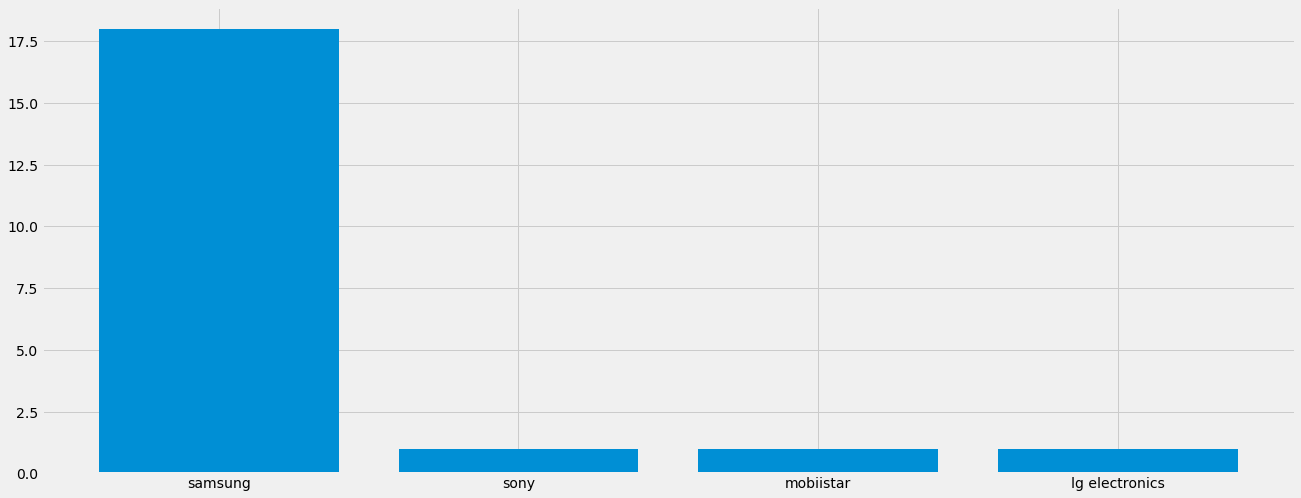

In [24]:
traverse_for_snapshot(folder_path)
sns.set_palette(sns.color_palette("hls", 15))
plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')
plt.bar(
    range(len(mobile_manufacturers)),
    mobile_manufacturers.values(),
    align='center')
plt.xticks(range(len(mobile_manufacturers)), list(mobile_manufacturers.keys()))

plt.show()

- If considering every image per IS folder then

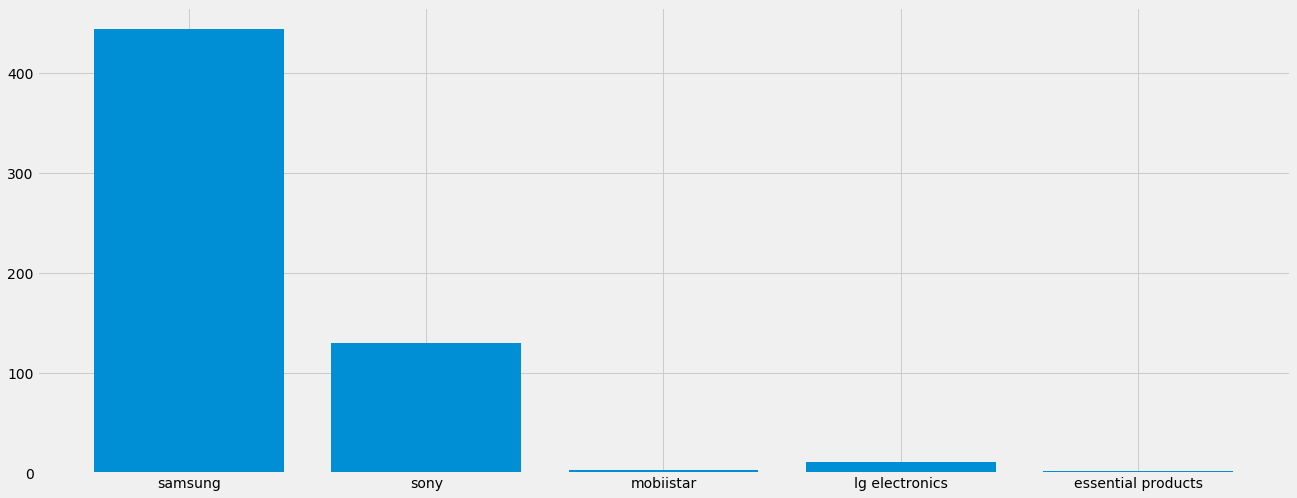

In [25]:
mobile_manufacturers = {}
traverse_for_snapshot(folder_path, False)
sns.set_palette(sns.color_palette("hls", 15))
plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')
plt.bar(
    range(len(mobile_manufacturers)),
    mobile_manufacturers.values(),
    align='center')
plt.xticks(range(len(mobile_manufacturers)), list(mobile_manufacturers.keys()))

plt.show()

In [45]:
data = pd.read_csv('Calllog.csv')
data = data.astype('str')

In [46]:
data.head()

Number                Name                                   Date  \
0   0940751626  King Of The Road 2  Thu Dec 13 19:42:50 جرينتش+02:00 2018   
1          MTN                 nan  Thu Dec 13 18:38:47 جرينتش+02:00 2018   
2  Fridayoffer                 nan  Thu Dec 13 17:38:28 جرينتش+02:00 2018   
3   0932932555        ذباح الجدايا  Thu Dec 13 16:43:08 جرينتش+02:00 2018   
4   0932932555        ذباح الجدايا  Thu Dec 13 16:31:49 جرينتش+02:00 2018   

       Type Duration Country  
0  INCOMING       43   Syria  
1  INCOMING        0   Syria  
2  INCOMING        0   Syria  
3  OUTGOING        0   Syria  
4  OUTGOING       34   Syria

In [47]:
def return_most_frequent(df, field):
    values, counts = np.unique(df[field], return_counts=True)
    zipped_list = zip(counts, values)
    frequent = [x for _, x in sorted(zipped_list, reverse=True)][0]
    return frequent

In [51]:
def details_of_most_frequent_numbers(data, value):
    data = data[data['Type'] == value]
    print(value)
    numbers, counts = np.unique(data['Number'], return_counts=True)
    zipped_list = zip(counts, numbers)
    most_frequent_incoming_numbers = [
        x for _, x in sorted(zipped_list, reverse=True)
    ][:7]
    for i, number in enumerate(most_frequent_incoming_numbers):
        dummy_df = data[data['Number'] == number]
        print("# ", i + 1)
        print("Number\t:\t" + str(number))
        print("NAME\t:\t" + str(return_most_frequent(dummy_df, "Name")))
        print("COUNTRY\t:\t" + str(return_most_frequent(dummy_df, "Country")))

### Observations:
- Samsungs Mobile are most frequent among all ISIS operatives.
- These are highest both in terms of Number of devices and Number of photos clicked

## Part 2:
Print details 5 most popular OUTGOING calls

In [52]:
details_of_most_frequent_numbers(data, "OUTGOING")

OUTGOING
#  1
Number	:	00966550326715
NAME	:	nan
COUNTRY	:	Yemen
#  2
Number	:	+32486794445
NAME	:	Zawjati️
COUNTRY	:	Belgium
#  3
Number	:	0933637039
NAME	:	جدي ندى
COUNTRY	:	Turkey
#  4
Number	:	+917780809871
NAME	:	Adal Bhat
COUNTRY	:	India
#  5
Number	:	123
NAME	:	nan
COUNTRY	:	India
#  6
Number	:	7006348792
NAME	:	Masroor
COUNTRY	:	India
#  7
Number	:	7780848045
NAME	:	Musaib Dhurani
COUNTRY	:	India


## Part 3:
Print details 5 most popular INCOMING calls

In [53]:
details_of_most_frequent_numbers(data, "INCOMING")

INCOMING
#  1
Number	:	Syriatel
NAME	:	nan
COUNTRY	:	Syria
#  2
Number	:	MTN
NAME	:	nan
COUNTRY	:	Syria
#  3
Number	:	+917780848045
NAME	:	Musaib Dhurani
COUNTRY	:	India
#  4
Number	:	+963997421993
NAME	:	هتلر
COUNTRY	:	Syria
#  5
Number	:	+917780809871
NAME	:	Adal Bhat
COUNTRY	:	India
#  6
Number	:	+32493858238
NAME	:	Yunes New
COUNTRY	:	Belgium
#  7
Number	:	+32486794445
NAME	:	Zawjati️
COUNTRY	:	Belgium


## Part 4:
Radial Plots representing frequency of calls made from Yemen, Syria and India.

In [54]:
data['time'] = [x.split()[3] for x in data['Date']]

In [55]:
def subtract_time(time, h, m):
    hour, minute, s = [int(s) for s in time.split(":")]
    minute -= m
    if minute < 0:
        minute += 60
        hour -= 1
    hour -= h
    if hour < 0:
        hour += 24
    return int((hour * 60 + minute) / 4)

In [56]:
yemen_data = data[data['Country'] == 'Yemen']
syria_data = data[data['Country'] == 'Syria']
india_data = data[data['Country'] == 'India']
yemen_data['hour'] = [subtract_time(t, 3, 0) for t in yemen_data['time']]
syria_data['hour'] = [subtract_time(t, 2, 0) for t in syria_data['time']]
india_data['hour'] = [subtract_time(t, 5, 30) for t in india_data['time']]

/home/aman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/aman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/aman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [59]:
def plot_radial_plot(data):
    val, count = np.unique(data['hour'], return_counts=True)
    N = len(val)
    r = count
    theta = val
    area = r**1.5
    colors = theta

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='polar')
    ax.set_xticklabels([3 * i for i in range(8)])
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_theta_offset(pi / 2.0)
    c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)
    plt.show()

### Yemen

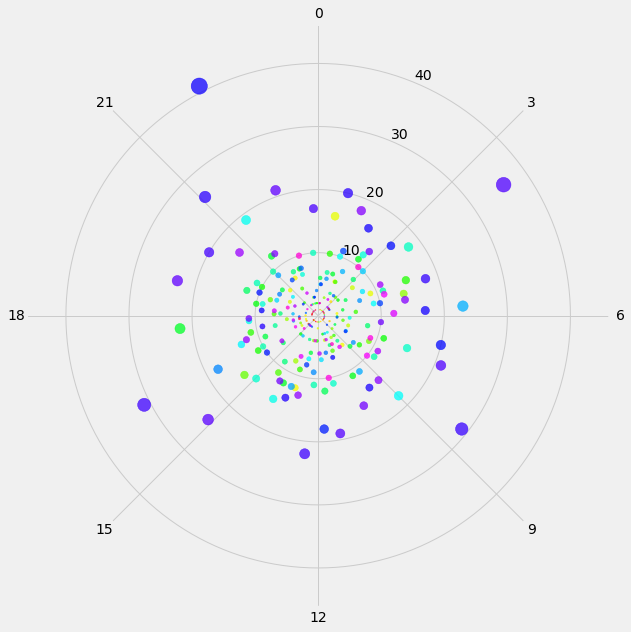

In [60]:
plot_radial_plot(yemen_data)

### Syria

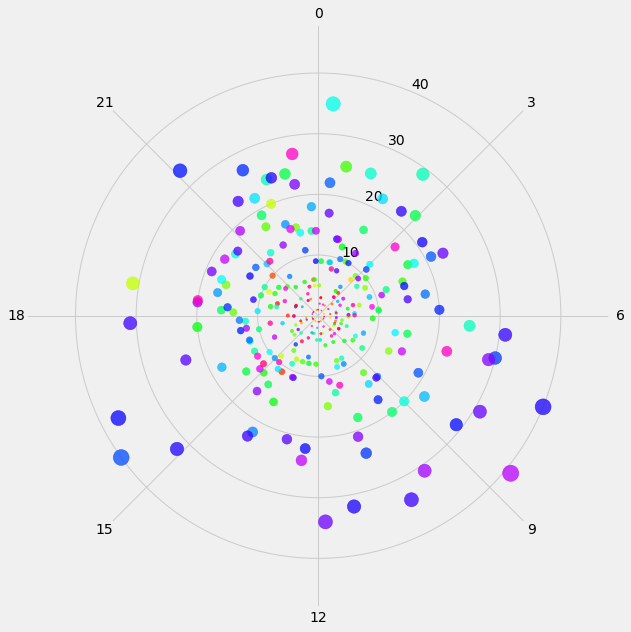

In [62]:
plot_radial_plot(syria_data)

### India

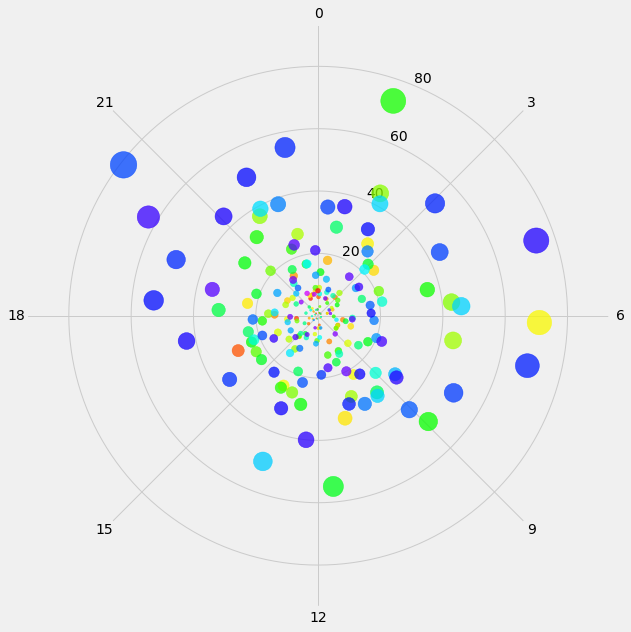

In [63]:
plot_radial_plot(india_data)

## Observations
- The plots are different for different countries.
- India has more frequent callers.
- Syria has least numbers of callers
- Syria has uniformly distributed callers for most time of day.
- For Yemen data is mostly located in lower half
- While for India major chunk on upper side

# Part 5: Call frequency and averages countrywise

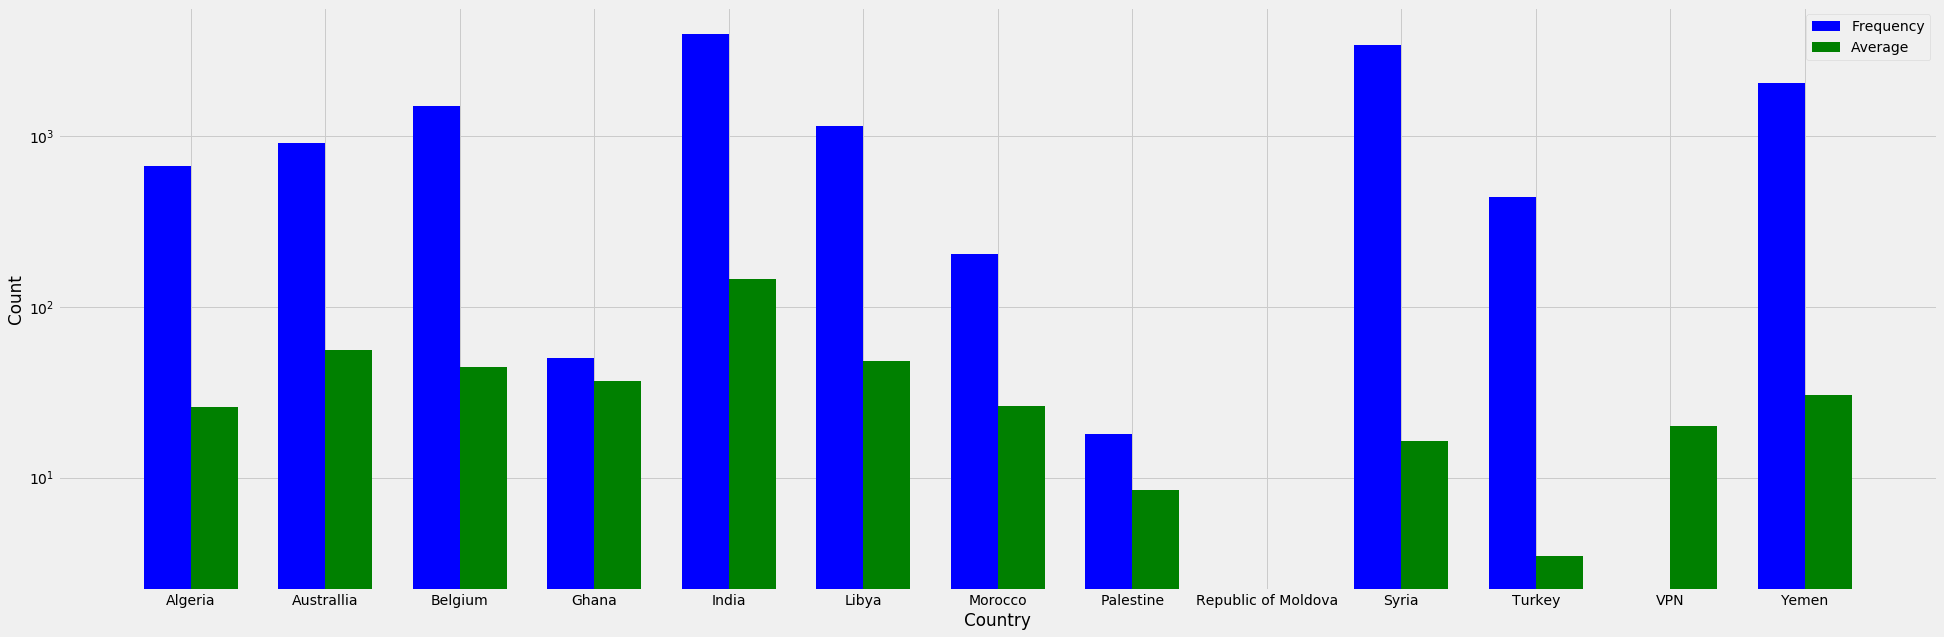

In [19]:
countries, count = np.unique(data['Country'], return_counts=True)
average = []
for country in countries:
    dummy_data = data[data['Country'] == country]
    #     display(dummy_data.head())
    average.append(dummy_data['Duration'].mean())
fig = plt.figure(figsize=(30, 10))
ax = plt.subplot(111)
ax.semilogy()
ind = np.arange(len(countries))  # the x locations for the groups
width = 0.35  # the width of the bars
p1 = ax.bar(ind, count, width=width, color='b', align='center')
ax.set_xticks(ind + width / 2)
p2 = ax.bar(ind + width, average, width=width, color='g', align='center')
ax.set_xticklabels(countries)
ax.legend((p1[0], p2[0]), ('Frequency', 'Average'))
ax.set_ylabel('Count')
ax.set_xlabel('Country')
plt.show()

## Observations:
- India has Highest call duration average.
- Yes It also has highest number of calls.
- Republic of Moldova has lowest number of calls and also lowest frequency.
- However it has two.
- Turkey has lowest call duration average.
- Palestine has lowest number of calls.